In [1]:
import numpy as np
import matplotlib.pyplot as plt


MACHINE_EPS = np.finfo(float).eps

In [2]:
def F(x):
    return 2 - x**2 - np.exp(x)

def dF(x):
    return -2*x - np.exp(x)

In [22]:
def newton(x0, f, df, ITERATIONS=100, TOLERANCE=MACHINE_EPS):
    """
    Approximates a root of the function f using Newton's method.

    Parameters:
    - x0 : array_like
        Initial guess for the root.
    - f : callable
        The function whose root is sought.
    - df : callable
        The derivative of the function `f`.
    - ITERATIONS : int, optional
        Maximum number of iterations (default is 100).
    - TOLERANCE : float, optional
        Minimum tolerance for convergence (default is MACHINE_EPS).

    Returns:
    - evaluations : list
        List containing the evaluations (approximations) at each iteration.
    - errors : list
        List containing the errors at each iteration.
    - num_evals : int
        Total number of function evaluations performed.
    """

    xn = x0  # Set initial guess
    errors = [1.0]  # Initialize the errors list with an initial value
    evaluations = [xn]  # Initialize the evaluations list with the initial guess
    num_evals = 0  # Initialize the count of function evaluations
    num_evals_lst = [0]

    while errors[-1] > TOLERANCE:  # Loop until error is below the tolerance
        f_val = f(xn)  # Evaluate the function at xn
        df_val = df(xn)  # Evaluate the derivative of the function at xn
        xn -= f_val / df_val  # Update xn using Newton-Raphson method: xn -= f_val / df_val
        evaluations.append(xn)  # Append the new evaluation to the list
        errors.append(
            np.linalg.norm(evaluations[-1] - evaluations[-2])
        )  # Compute and append the error (norm of the difference between the last two evaluations)
        num_evals += 3  # Increment the count of function evaluations
        num_evals_lst.append(num_evals)

    return evaluations[-1], errors, num_evals_lst  # Return the evaluation history, error history, and total evaluations



In [23]:
def broyden_method(x0, f, df, ITERATIONS=100, TOLERANCE=MACHINE_EPS):
    """
    Approximates a root of the function f using Broyden's method.

    Parameters:
    - x0 : array_like
        Initial guess for the root.
    - f : callable
        The function whose root is sought.
    - df : callable
        The derivative of the function `f`.
    - ITERATIONS : int, optional
        Maximum number of iterations (default is 100).
    - TOLERANCE : float, optional
        Minimum tolerance for convergence (default is MACHINE_EPS).

    Returns:
    - x2 : array_like
        Approximation of the root.
    - errors : numpy.ndarray
        Array containing the errors at each iteration.
    - evaluations : list
        List containing the number of evaluations at each iteration.
    """
    x2=0
    errors = []  # Initialize a list to store errors at each iteration
    num_evals = 0  # Initialize the count of function evaluations
    evaluations = []  # Initialize a list to store the number of evaluations at each iteration

    # Newton step
    x1 = x0 - f(x0) / df(x0)  # Initial update using Newton's method
    error = np.abs(x1 - x0)  # Compute the error between x1 and x0
    errors.append(error)  # Store the initial error
    num_evals += 2  # Increment the count of function evaluations (2 evaluations done)
    evaluations.append(num_evals)  # Store the number of evaluations

    # Broyden's method iteration
    for n in range(2, ITERATIONS + 1):
        if np.abs((f(x1) - f(x0))) < TOLERANCE:  # Check for convergence
            break  # If converged, exit the loop

        x2 = x1 - f(x1) * (x1 - x0) / (f(x1) - f(x0))  # Update using Broyden's method
        
        error = np.abs(x2 - x1)  # Compute the error between x2 and x1
        errors.append(error)  # Store the error
        num_evals += 2  # Increment the count of function evaluations (2 evaluations done)
        evaluations.append(num_evals)  # Store the number of evaluations
        
        x0, x1 = x1, x2  # Update x0 and x1 for the next iteration

    return x2, np.array(errors), evaluations  # Return the approximation of the root, errors array, and evaluations list


In [24]:
evaluations, errors, num_evals = newton (2.5, F, dF)
root_broyden, errors_broyden, function_eval_broyden = broyden_method(2.5, F, dF)

[3, 6, 9, 12, 15, 18, 21, 24]

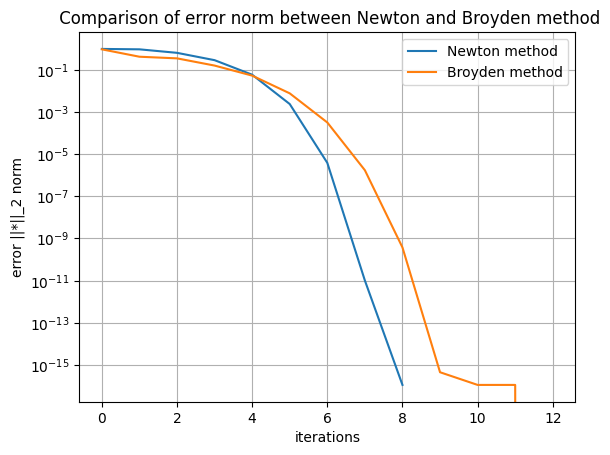

In [6]:
fig, ax = plt.subplots(1,1)
ax.plot(errors, label = 'Newton method')
ax.plot(errors_broyden, label = 'Broyden method')
ax.set( yscale = 'log',xlabel = 'iterations', ylabel = 'error ||*||_2 norm', 
       title = ' Comparison of error norm between Newton and Broyden method')
ax.grid()
ax.legend()

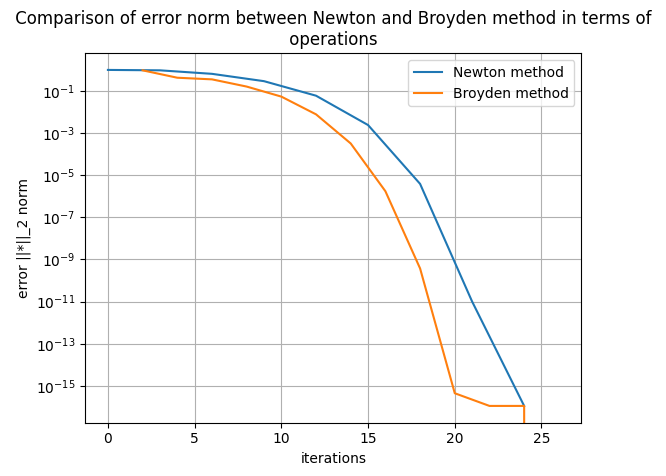

In [27]:
fig, ax = plt.subplots(1,1)
ax.plot(num_evals, errors, label = 'Newton method')
ax.plot(function_eval_broyden, errors_broyden, label = 'Broyden method')
ax.set( yscale = 'log',xlabel = 'iterations', ylabel = 'error ||*||_2 norm', 
       title = ' Comparison of error norm between Newton and Broyden method in terms of \n operations ')
ax.grid()
ax.legend()

In [34]:
#Calculate convergence order
convergence_order_broyden = np.log(errors_broyden[1:]/errors_broyden[:-1])

/var/folders/89/w_60r_4x0cj3g1zv6zj2235h0000gn/T/ipykernel_17105/2740393764.py:2: RuntimeWarning: divide by zero encountered in log
  convergence_order_broyden = np.log(errors_broyden[1:]/errors_broyden[:-1])


/var/folders/89/w_60r_4x0cj3g1zv6zj2235h0000gn/T/ipykernel_17105/4148725359.py:2: RuntimeWarning: divide by zero encountered in log
  convergence_order_broyden = np.log(errors_broyden[1:]/errors_broyden[:-1])


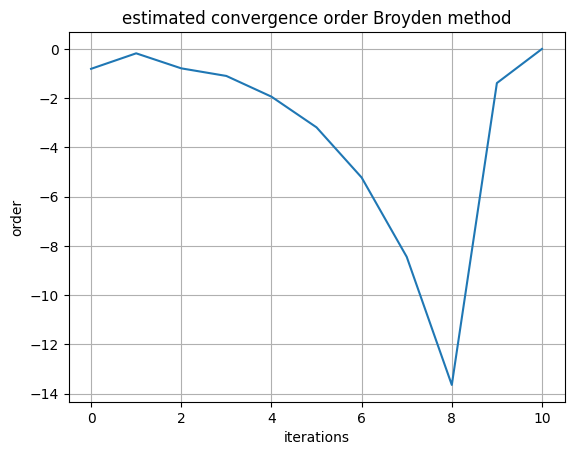

In [35]:

#Calculate convergence order
convergence_order_broyden = np.log(errors_broyden[1:]/errors_broyden[:-1])

fig, ax = plt.subplots(1,1)

ax.plot(convergence_order_broyden)
ax.set(xlabel = 'iterations', ylabel = 'order', title = 'estimated convergence order Broyden method')
ax.grid()